In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import time
from sklearn.model_selection import cross_val_score

In [2]:
toys1 = pd.read_json('Toys_and_Games_5.json', lines=True)
toys = toys1.loc[np.random.choice(toys1.index, 50000, replace=False)].reindex()

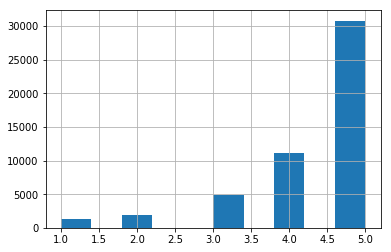

In [3]:
toys['overall'].hist()

In [4]:
toys['positive_rating'] = np.where(toys.overall >=4, 1, 0)

In [5]:
toys

,asin,helpful,overall,reviewText,reviewTime,reviewerID,reviewerName,summary,unixReviewTime,positive_rating
9286,B00005BY3W,"[0, 0]",5,My 2.5 year old son likes these cute light-up ...,"02 15, 2013",A2O7Z4RCG4X2M8,A. Smith,Shiny lights!! oooohhh....,1360886400,1
141313,B00A8HOX1C,"[0, 0]",5,I'm 8 years old. It was challenging to put tog...,"01 5, 2014",A1DALUGDVH1CDE,Elijah,Awesome I love it!!!!,1388880000,1
110147,B005VPREUI,"[3, 6]",4,I scoffed when I first saw this set. Dog show...,"03 2, 2012",A3OPRY7N8UT2HU,. .,versatile kit,1330646400,1
114580,B006O6ETYC,"[0, 1]",5,MY DAUGHTER LOVED IT AND THE PRICE WAS JUST RI...,"02 7, 2013",A1QAOZV4ZAGDN6,Hello Kitty,LOVED IT,1360195200,1
124902,B007RYE2V0,"[0, 0]",5,"This is a cool cardboard box, shaped like a to...","06 9, 2014",A1SD1C8XK3Z3V1,"guitfiddleblue ""guitfiddleblue""",cool,1402272000,1
162266,B00EC901O0,"[6, 6]",4,This looked like something my 10 year old migh...,"11 9, 2013",ABQWMANK4AR63,"John S. Dean ""John""",Enjoyable for the uniqueness of working on mor...,1383955200,1
21898,B0006NDB6Q,"[0, 0]",5,"I'm not good with dimensions, because I had no...","11 30, 2012",A1AMRAAFW8QBYF,"Tulor ""Yvonne""",Small Wagon,1354233600,1
16645,B00017ILJ4,"[0, 0]",5,What an amazing Lil' Quad for a 19 month old. ...,"04 6, 2014",A1QACB8S7QQ2B8,Patricia A. Donohue,Great Lil'Quad,1396742400,1
41135,B000OV7A62,"[5, 7]",5,My kids (ages 7 and 4) really love this bird. ...,"12 30, 2007",A3MNV91GLZ4LFC,"Joey & G's Mommy ""Jill""",Cute bird,1198972800,1
46573,B00112CHD4,"[0, 0]",5,Apples to Apples is a regular at our family ga...,"04 16, 2013",AKMEY1BSHSDG7,J. Arena,Really fun!,1366070400,1


In [6]:
#df = toys[['reviewText', 'positive_rating']]

In [7]:
toys['positive_rating'] = (toys['positive_rating'] == 1)

In [8]:
toys['reviewText'] = toys.reviewText.str.replace(r'[^a-zA-Z\d\s:]', '')
toys['reviewText'] = toys['reviewText'].str.lower()

pos_words = toys.reviewText[toys.overall].str.cat(sep=' ').split()

neg_words = toys.reviewText[toys.overall == False].str.cat(sep=' ').split()

/opt/conda/envs/fastai/lib/python3.6/site-packages/pandas/core/series.py:841: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


In [9]:
# Unique Words
print('negative:', len(np.unique(neg_words)), ' positive:', len(np.unique(pos_words)))

negative: 0  positive: 29


In [10]:
keywords = pd.Series(neg_words).value_counts().keys().ravel()

keywords

array([], dtype=float64)

In [11]:
diff = np.setdiff1d(
        ar1=pd.Series(pos_words).value_counts().keys().ravel(), 
                      ar2=pd.Series(neg_words).value_counts().keys().ravel()
                     )
diff

array(['a', 'additional', 'and', 'around', 'board', 'bought', 'carry',
       'doug', 'for', 'from', 'hope', 'increase', 'is', 'it', 'kids',
       'letter', 'magnetic', 'mellissa', 'nice', 'pieces', 'play', 'the',
       'them', 'thier', 'this', 'time', 'to', 'with', 'works'],
      dtype=object)

In [12]:
new = toys
keywords = diff

for key in keywords:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    new[str(key)] = new.reviewText.str.contains(
        ' ' + str(key) + ' ',
        case=False
    )

X = new[keywords]
y = new['positive_rating']

In [13]:
time1 = time.time()

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X, y)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(X)

In [14]:
cross_val_score(bnb, X, y, cv=5)

array([0.83871613, 0.8392    , 0.8388    , 0.8388    , 0.83868387])

In [15]:
print('Naive Bayes runtime')
print('--- %s seconds ---' % (time.time() - time1))

Naive Bayes runtime
--- 0.18857765197753906 seconds ---


In [16]:
time2 = time.time()

from sklearn.svm import SVC
svc = SVC()

X = new[keywords]
y = new['positive_rating']

svc.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [17]:
cross_val_score(svc, X, y, cv=5)

array([0.8390161 , 0.839     , 0.839     , 0.839     , 0.83908391])

In [18]:
print('SVM runtime')
print('--- %s seconds ---' % (time.time() - time2))

SVM runtime
--- 512.3767306804657 seconds ---
